In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = os.listdir('/content/drive/MyDrive/archive (4)')

classes = {'no_tumor':0, 'pituitary_tumor':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/archive (4)/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape

(1222, 200, 200)

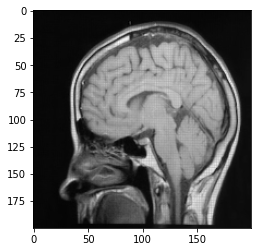

In [ ]:
plt.imshow(X[1], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [ ]:
xtrain.shape, xtest.shape

((855, 40000), (367, 40000))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9318801089918256


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.991812865497076
Testing Score: 0.9591280653950953


In [ ]:
pred = sv.predict(xtest)
np.where(ytest!=pred)

(array([  2,  28,  47,  54,  90, 135, 151, 219, 220, 284, 295, 320, 348,
        356, 360]),)

In [ ]:
pred[36]

1

In [ ]:
ytest[28]

0

In [ ]:
dec = {0:'No Tumor', 1:'Tumor'}

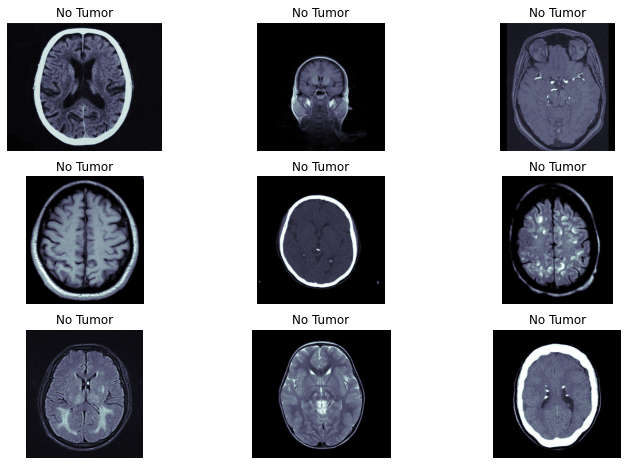

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/archive (4)/Training/')
c=1
for i in os.listdir('/content/drive/MyDrive/archive (4)/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/drive/MyDrive/archive (4)/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='bone')
    plt.axis('off')
    c+=1

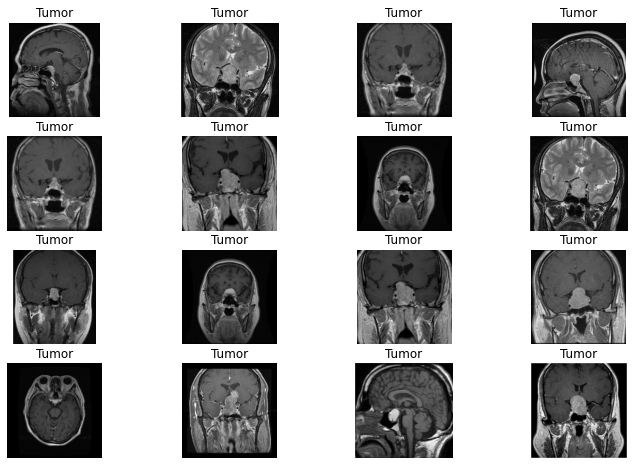

In [ ]:
plt.figure(figsize=(12,8))
c=1
for i in os.listdir('/content/drive/MyDrive/archive (4)/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('/content/drive/MyDrive/archive (4)/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title('Tumor')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1